# Preprocessing

This file is for applying same operations on test data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/test.csv')
data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


varible definitions at: https://www.kaggle.com/competitions/titanic/data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
category_cols = ['Pclass', 'Sex', 'SibSp', 'Parch',
                'Embarked', 'Cabin']

numeric_cols = ['Age', 'Fare']

target = 'Survived'   # There is no target in test data

discard_cols = ['PassengerId', 'Ticket', 'Name']

assert len(category_cols) + len(numeric_cols) + len(discard_cols) == data.shape[1]

In [5]:
print(data.count() / len(data))

PassengerId    1.000000
Pclass         1.000000
Name           1.000000
Sex            1.000000
Age            0.794258
SibSp          1.000000
Parch          1.000000
Ticket         1.000000
Fare           0.997608
Cabin          0.217703
Embarked       1.000000
dtype: float64


In [6]:
# Cabin missing too much and is beyond repairing
if 'Cabin' in category_cols: category_cols.remove('Cabin')
discard_cols.append('Cabin')

data['Sex'].replace(to_replace='female', value=0, inplace=True)
data['Sex'].replace(to_replace='male',  value=1, inplace=True)

set(data['Embarked'])

{'C', 'Q', 'S'}

In [7]:
data['Embarked'].replace(to_replace='C', value=0, inplace=True)
data['Embarked'].replace(to_replace='Q',  value=1, inplace=True)
data['Embarked'].replace(to_replace='S',  value=2, inplace=True)

In [8]:
features = data.drop(columns=discard_cols).copy()

In [9]:
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


## Missing values

In [10]:
print(features.count() / len(features))

Pclass      1.000000
Sex         1.000000
Age         0.794258
SibSp       1.000000
Parch       1.000000
Fare        0.997608
Embarked    1.000000
dtype: float64


Age can be filled in by some methods

kNN is not suitable for continuous variables since K is unknown, we use 序贯热平台插补

Notice that in numpy all missing values are `np.nan`, that said, other variables might have semantically missing values, like ' ' or something else, all good here by checking the original data

In [11]:
# we can bin the Age, change it from continuous to discrete
features['Age'] = pd.cut(np.array(features['Age']), bins=5).codes
dummy_features = features.copy()
dummy_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,7.8292,1
1,3,0,3,1,0,7.0000,2
2,2,1,4,0,0,9.6875,1
3,3,1,1,0,0,8.6625,2
4,3,0,1,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,-1,0,0,8.0500,2
414,1,0,2,0,0,108.9000,0
415,3,1,2,0,0,7.2500,2
416,3,1,-1,0,0,8.0500,2


In [12]:
print(dummy_features.corr())
print(np.sort(dummy_features.corr()['Age']))

            Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Pclass    1.000000  0.108615 -0.484121  0.001087  0.018721 -0.577147  0.227983
Sex       0.108615  1.000000 -0.063315 -0.099943 -0.159120 -0.191514  0.076281
Age      -0.484121 -0.063315  1.000000 -0.003120 -0.020687  0.342065 -0.036425
SibSp     0.001087 -0.099943 -0.003120  1.000000  0.306895  0.171539  0.052708
Parch     0.018721 -0.159120 -0.020687  0.306895  1.000000  0.230046  0.054577
Fare     -0.577147 -0.191514  0.342065  0.171539  0.230046  1.000000 -0.257183
Embarked  0.227983  0.076281 -0.036425  0.052708  0.054577 -0.257183  1.000000
[-0.48412078 -0.06331514 -0.03642546 -0.02068719 -0.00311978  0.34206532
  1.        ]


Take the `absolute value` of correlation coefficient, Pclass is has the largest correlation with Age, 

plus, Pclass is full, so we take Pclass for 序贯热平台插补

> 假设我们要填特征B，特征A与B的相关性最高，我们将A按照降序进行排列，这种顺序应用到B上，然后B取特征内的上方样本的值填补缺失

In [13]:
dummy_features.sort_values('Pclass', ascending=False, inplace=True) # the order of features changes after this

for i in range(dummy_features.shape[0]):
    if i == 0 and dummy_features['Age'][i] == -1:   # if the first row is missing, take the nearest lower valid value
        for j in range(i, dummy_features.shape[0]):
            if dummy_features['Age'][j] != -1:
                dummy_features['Age'][i] = dummy_features['Age'][j]
                break
    if dummy_features['Age'][i] == -1:      # otherwise take the nearest upper valid value
        for j in range(i, -1, -1):
            if dummy_features['Age'][j] != -1:
                dummy_features['Age'][i] = dummy_features['Age'][j]
                break
dummy_features

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_65416\890501509.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_features['Age'][i] = dummy_features['Age'][j]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,7.8292,1
232,3,1,1,1,0,6.4958,2
249,3,0,1,1,0,14.4542,0
244,3,1,2,1,2,23.4500,2
243,3,1,2,0,0,7.8875,2
...,...,...,...,...,...,...,...
239,1,0,3,1,0,106.4250,0
158,1,1,2,0,0,26.5500,2
240,1,0,3,0,0,27.7208,0
77,1,0,3,2,0,25.7000,2


In [14]:
# change the order back
dummy_features_reset = dummy_features.reset_index()
dummy_features_reset.sort_values('index', ascending=True, inplace=True)
dummy_features_reset = dummy_features_reset.drop(columns='index')
dummy_features = dummy_features_reset.reset_index().drop(columns='index')
dummy_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,2,0,0,7.8292,1
1,3,0,3,1,0,7.0000,2
2,2,1,4,0,0,9.6875,1
3,3,1,1,0,0,8.6625,2
4,3,0,1,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,1,0,0,8.0500,2
414,1,0,2,0,0,108.9000,0
415,3,1,2,0,0,7.2500,2
416,3,1,2,0,0,8.0500,2


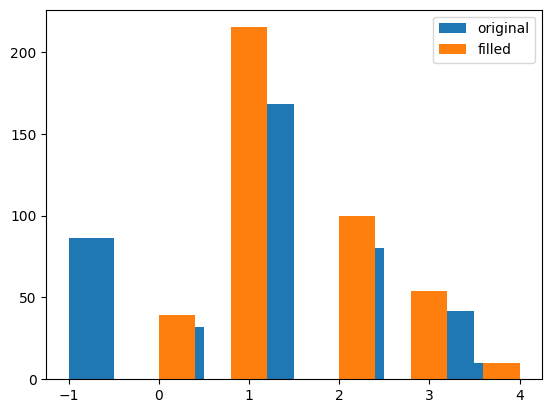

In [15]:
from matplotlib import pyplot as plt

plt.hist(features['Age'], label="original")
plt.hist(dummy_features['Age'], label="filled")
plt.legend()

And that's for *Age*, now for *Embarked*, there are 2 missing values, ~~just drop these 2 rows~~

**Caution**: dropping the rows leaves un-continuous row index in pandas, e.g. 0, 1, 3, 5, 6, 7, ..., errors might happen when using pd.concat(), which is based on row index

you can reset the row index by
```python
    dummy_features = dummy_features.reset_index().drop(columns='index')
```

but what about the labels? Delete which rows for y? It's troublesome, so just fill the missing values for *Embarked*

In [16]:
dummy_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int8   
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5), int8(1)
memory usage: 20.1 KB


<mark>One question: the missing values in test set should be filled with training set or test set?</mark>

- If test set: Same rules as training set

- If training set: so proiri on test set, presumably more reasonable?

<mark>One most fundamental principle is never doing calculations on test data since they should be treated as if not existed!</mark>

(from Internet: )

> Build a transformation pipeline that can handle all the necessary preprocessing steps (impute missing data, standardize, perform desired feature engineering, dimensionality reduction...) on training set and when a new observation comes (we should treat test set as just a new observations that are unavailable during training) apply this pipeline transformations on that new data.

In [17]:
for i in range(dummy_features.shape[0]):
    if(np.isnan(dummy_features['Fare'][i])):
        dummy_features['Fare'][i] = dummy_features['Fare'].mean()
dummy_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int8   
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5), int8(1)
memory usage: 20.1 KB


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_65416\1585715768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_features['Fare'][i] = dummy_features['Fare'].mean()


In [18]:
dummy_features.to_csv('../data/X_test_preprocessed.csv', index=False)